# HW 1

### Step 1: GC-content calculation

In [85]:
from Bio import SeqIO
from matplotlib import pyplot as plt
import statistics

In [55]:
with open('data/test3_edited.fastq', 'w') as new:
    with open('data/test3.fastq', 'r') as old:
        for line in old:
            if line[0] == '+':
                new.write('+\n')
            else:
                new.write(line)

In [18]:
def get_GC_percentage(seq):
    G_cnt = seq.count('G')
    C_cnt = seq.count('C')
    return (G_cnt + C_cnt) / len(seq) * 100

In [110]:
def analyse_GC_content(fastq_file_path):
    cnt_to_percent = dict()
    pers = []
    with open(fastq_file_path) as file:
        for record in SeqIO.parse(file, 'fastq'):
            percentage = round(get_GC_percentage(record.seq))
            pers.append(percentage)
            if percentage in cnt_to_percent:
                cnt_to_percent[percentage] += 1
            else:
                cnt_to_percent[percentage] = 1
    percent = []
    cnt = []
    for key in sorted(cnt_to_percent):
        percent.append(key)
        cnt.append(cnt_to_percent[key])
    plt.bar(percent, cnt)
    plt.ylabel("Number of reads")
    plt.xlabel("% GC")
    plt.show()

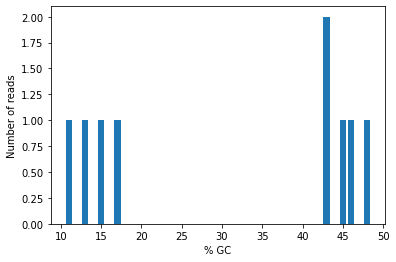

In [111]:
analyse_GC_content('data/test.fastq')

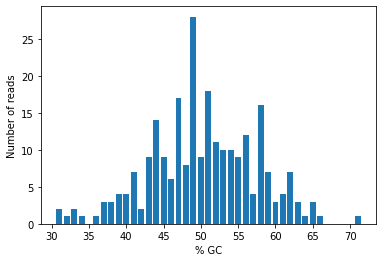

In [112]:
analyse_GC_content('data/test3_edited.fastq')

### Step 2: Quality distribution

In [69]:
quality_symbols = "!\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHI"

In [97]:
def analyse_quality_distribution(fastq_file_path):
    quality = []
    with open(fastq_file_path) as file:
        for record in SeqIO.parse(file, 'fastq'):
            record_quality = record.letter_annotations["phred_quality"]
            if len(quality) == 0:
                quality = [[] for i in range(len(record_quality))]
            for i in range(len(quality)):
                quality[i].append(record_quality[i])
    for i in range(len(quality)):
        quality[i] = statistics.mean(quality[i])
    x = range(len(quality))
    plt.plot(x, quality)
    plt.xlabel("Position in the read")
    plt.ylabel("Quality")
    plt.ylim([0, 40])
    plt.show()

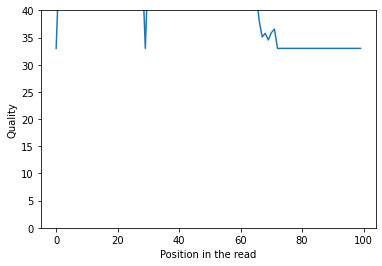

In [104]:
analyse_quality_distribution('data/test.fastq')

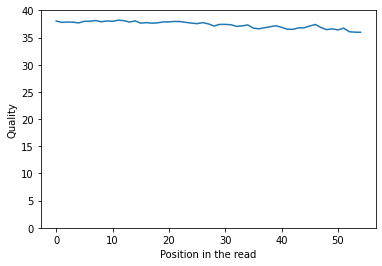

In [99]:
analyse_quality_distribution('data/test3_edited.fastq')

### Step 3: Checking the results

In [106]:
from IPython.display import Image
from IPython.core.display import HTML 

1. GC-content

For test.fastq:

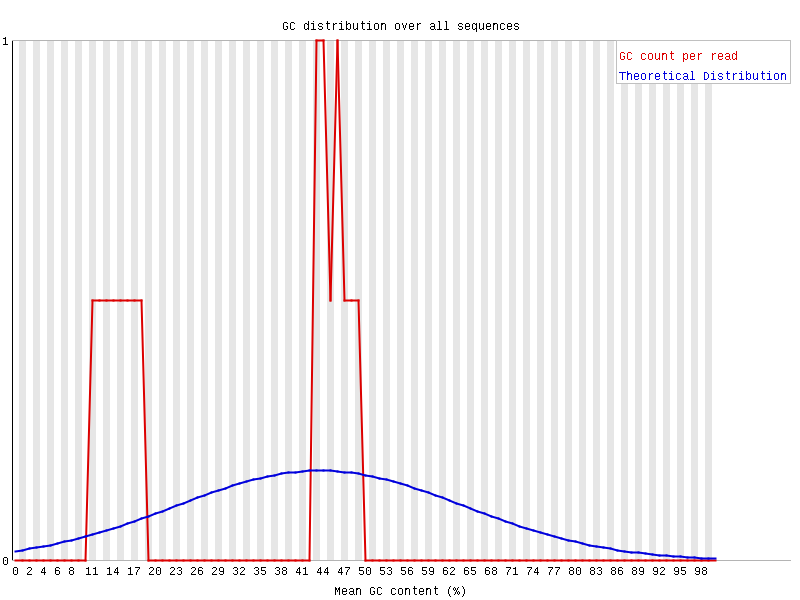

In [113]:
Image("data/test_GC_content.png")

This grahp coincides my result

For test3.fastq:

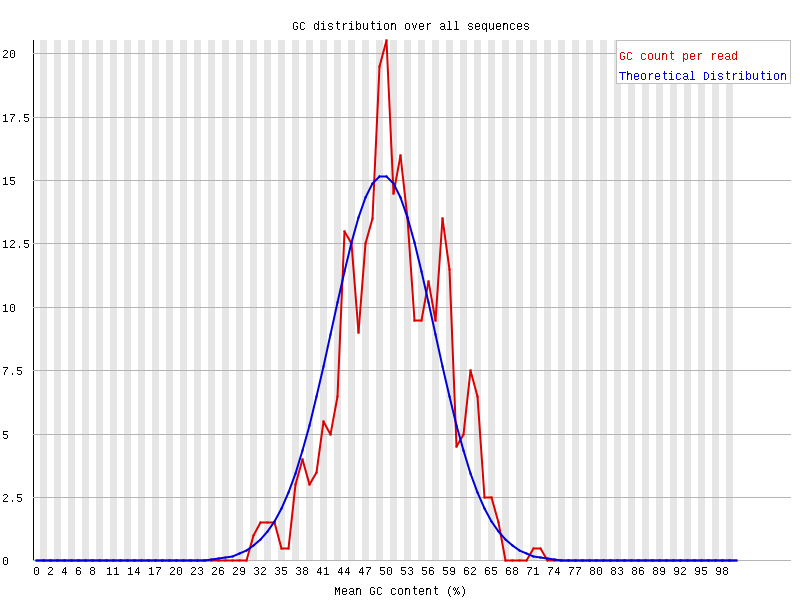

In [114]:
Image("data/test3_GC_content.png")

This grahp coincides my result

2. Per base quality

For test.fastq:

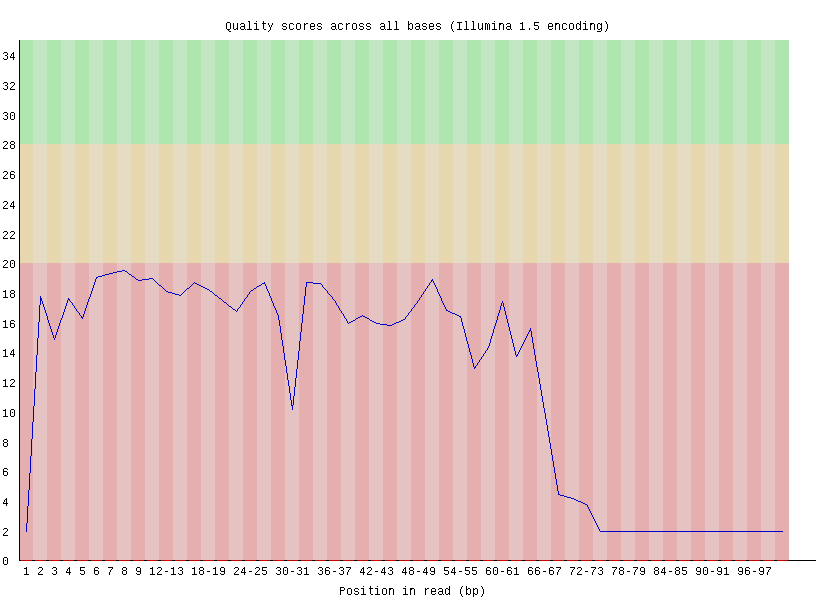

In [116]:
Image("data/test_quality.png")

This graph does not match my result :(

For test3.fastq:

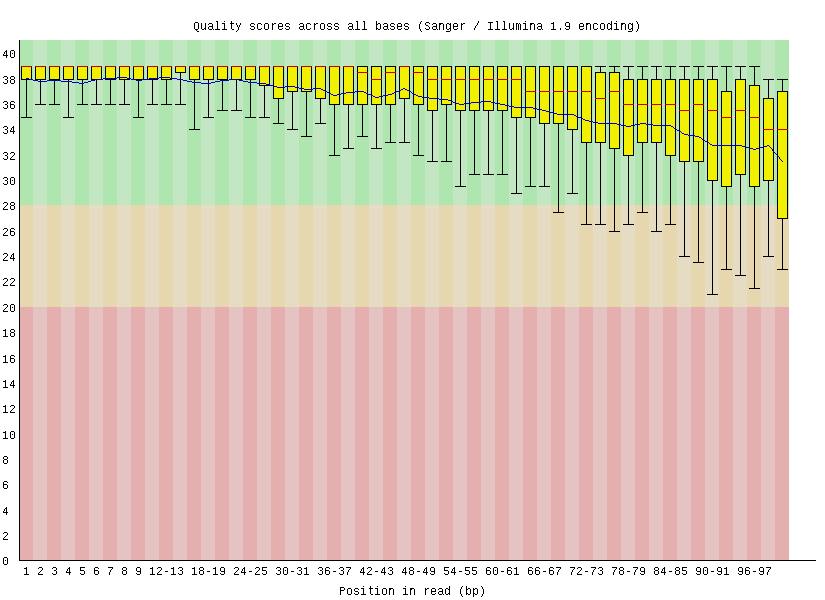

In [118]:
Image("data/test3_quality.png")

This grahp coincides my result